# Exploratory Analysis

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import collections
import seaborn as sns
import datetime
# import pmdarima as pm

In [31]:
figures_file_loc = '../reports/figures/'

In [32]:
!ls ../data/raw

2012.csv.zip         2015.csv.zip         2018.csv.zip
2013.csv.zip         2016.csv.zip         2019.csv.zip
2014.csv.zip         2017.csv.zip         blockface_detail.csv


In [33]:
blockface_detail = pd.read_csv('../data/raw/blockface_detail.csv', index_col='sourceelementkey')

In [34]:
blockface_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 1001 to 136322
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1505 non-null   int64  
 1   blockfacename             1505 non-null   object 
 2   location                  1505 non-null   object 
 3   paidparkingarea           1505 non-null   object 
 4   paidparkingsubarea        1147 non-null   object 
 5   parkingcategory           1505 non-null   object 
 6   parkingspacecount         1505 non-null   int64  
 7   parkingtimelimitcategory  1504 non-null   float64
 8   sideofstreet              1505 non-null   object 
 9   latitude                  1505 non-null   float64
 10  longitude                 1505 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 141.1+ KB


# Locations of parking spots

Let's see where all of the parking spaces are located!

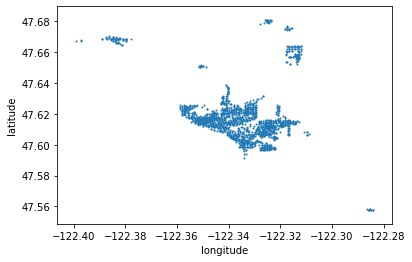

In [35]:
blockface_detail.plot(x='longitude', y='latitude', kind='scatter', s=1)
#fig = plt.gcf()
#fig.set_size_inches(5.26, 9.02)

#plt.ylim(47.55, 47.7)
#plt.xlim(-122.41, -122.28)
plt.show()

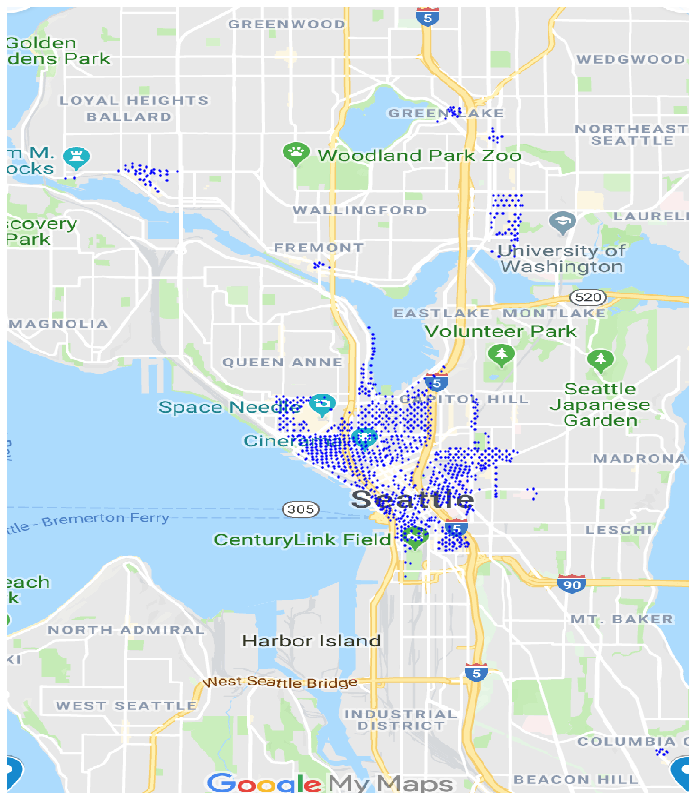

In [36]:
img = matplotlib.image.imread('../reports/figures/seattle_map.png')

dpi=80

height, width, nbands = img.shape

# What size does the figure need to be in inches to fit the image?
figsize = width / float(dpi), height / float(dpi)

# Create a figure of the right size with one axes that takes up the full figure
fig = plt.figure(figsize=figsize)

ax = fig.add_axes([0, 0, 1, 1])

# Hide spines, ticks, etc.
ax.axis('off')

ax.imshow(img,extent=[-122.41, -122.28,47.55, 47.7])

ax.scatter(blockface_detail.longitude,blockface_detail.latitude,color='b', s=1.5)


plt.savefig('../reports/figures/parking_overlaid.png', dpi=dpi)



Most of the parking spaces are clustered in the downtown area. But, there are a number of paid parking locations elsewhere in the city, including Columbia City, U-District, Fremont, and Ballard.

In [37]:
parking_area = blockface_detail.groupby('paidparkingarea').sum().reset_index()

In [38]:
parking_area

,paidparkingarea,Unnamed: 0,parkingspacecount,parkingtimelimitcategory,latitude,longitude
0,12th Avenue,8116,74,1560.0,618.918363,-1590.118278
1,Ballard,43116,542,11190.0,2717.080987,-6975.855561
2,Ballard Locks,4404,80,720.0,143.002308,-367.193352
3,Belltown,170939,1921,49890.0,12141.792233,-31198.571379
4,Capitol Hill,24198,364,5400.0,1809.536575,-4648.191765
5,Cherry Hill,4544,57,720.0,285.643496,-733.858325
6,Chinatown/ID,56773,401,8160.0,3236.683846,-8318.108187
7,Columbia City,5075,70,1440.0,475.578586,-1222.852078
8,Commercial Core,119002,1043,19860.0,6998.222174,-17983.404606
9,Denny Triangle,68197,542,18990.0,4333.104542,-11132.627540


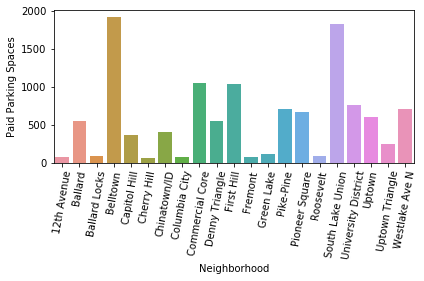

In [39]:
fig, ax = plt.subplots()
g = sns.barplot(data=parking_area, x='paidparkingarea', y='parkingspacecount', ax=ax)
_ = plt.xticks(rotation=80)
ax.set_ylabel('Paid Parking Spaces')
ax.set_xlabel('Neighborhood')
plt.tight_layout()
plt.savefig('../reports/figures/parking_spaces_by_neighborhood.png')

Specifically, Belltown and South Lake Union have the largest numbers of paid parking spaces.

# General Trends

To inspect general trends in the data, I group the data into daily averages for each blockface.

In [40]:
def using_Grouper(df):
    level_values = df.index.get_level_values
    return (df.groupby([level_values(0)]
                       +[pd.Grouper(freq='1D', level=-1)]).mean())

In [41]:
# years = range(2012, 2020)

# all_data = []

# for year in years:
#     year_data = pd.read_pickle('1.collect_data/data_files/%d.pkl' % year)
#     year_by_day = using_Grouper(year_data)
#     all_data.append(year_by_day)
# daily_data = pd.concat(all_data)

daily_data = pd.read_pickle('../data/interim/data_by_day.pkl')

In [42]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3247231 entries, (1001, Timestamp('2012-01-03 00:00:00')) to (136322, Timestamp('2019-08-30 00:00:00'))
Data columns (total 2 columns):
 #   Column             Dtype  
---  ------             -----  
 0   PaidOccupancy      float64
 1   ParkingSpaceCount  float64
dtypes: float64(2)
memory usage: 62.1 MB


In [43]:
daily_data.loc[1001].describe()

,PaidOccupancy,ParkingSpaceCount
count,2032.000000,2032.000000
mean,1.701777,5.082185
std,0.854680,0.756809
min,0.000000,4.000000
25%,1.086111,5.000000
50%,1.654167,5.000000
75%,2.243056,5.000000
max,8.213296,7.000000


We can see that the number of available spots has changed through the years, with a max of 7 spots available for ID 1001, and a min of 4. Additionally, the amount of spots being paid for has ranged from 0 to 8.2. 

There seems to be an error here (8.2 spots taken is higher than the max of 7), but the system doesn't preclude people from paying for the same spot. Parking payment is verified through a receipt displayed in the window. So if somebody pays for a spot and leaves, without having used the entire time that they purchased, somebody else can arrive and pay for the same spot. But, it seems unlikely that this would be the case for the entire day.

Let's now take a look at plots of parking occupancy for a bunch of blocks

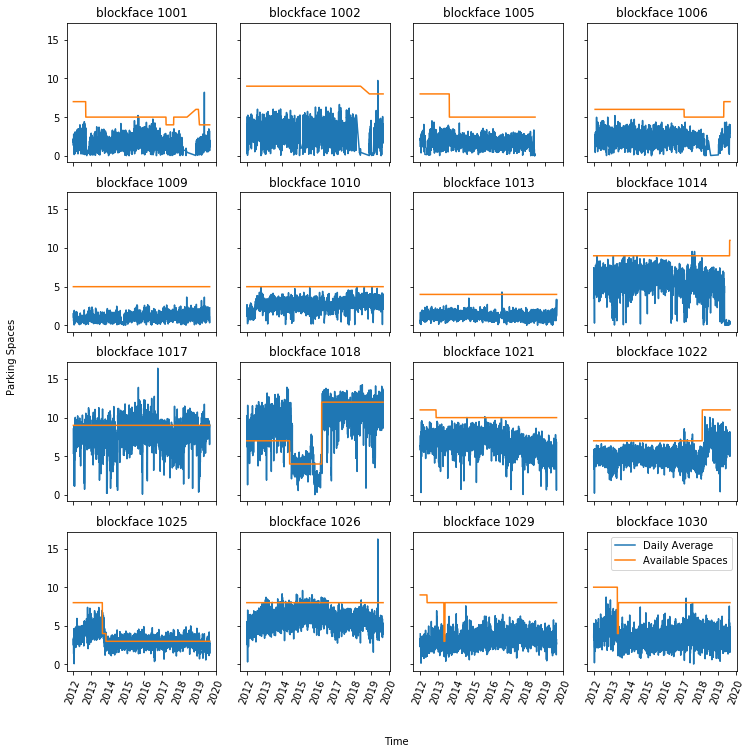

In [44]:
blockface_ids = daily_data.index.unique(level=0)[:16].values

fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    ax.set_title('blockface %d' % blockface_id)
    ax.plot(daily_data.loc[blockface_id].index, daily_data.loc[blockface_id]['PaidOccupancy'], label='Daily Average')
    ax.plot(daily_data.loc[blockface_id].index, daily_data.loc[blockface_id]['ParkingSpaceCount'], label='Available Spaces')
    #ax.legend()
    ax.xaxis.set_tick_params(rotation=70)
ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Spaces', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('../reports/figures/Daily_Average_Parking_Occpancy_Select_Blocks.png')


There are a number of interesting things in the plots.

1. For blockfaces 1001, 1002, 1006, there appears to be some missing occupancy data. But, it could be the case that, e.g., construction was occuring in the area at the time ([Seattle has a lot of construction!](https://www.king5.com/article/news/seattle-still-the-crane-capital-of-the-us/281-7f6d9c57-e6dd-4eef-986f-25af5361952a)) limiting the number of parking spaces actually available on the block.
2. The data for blockface 1005 ends in 2018. Since city streets and paid parking locations are revised every year, it could be that this location does not have paid parking any longer. Rechecking the data online shows that there is no data past the middle of 2018.
3. Some blockfaces show an average higher than the maximum. I should recheck this data to see what is going on here.

In [45]:
#daily_data.to_pickle('1.collect_data/data_by_day.pkl')

## General Trends for the whole city

Let's see how available parking spaces has changed over time.

In [46]:
all_blocks = daily_data.groupby(daily_data.index.get_level_values(1)).sum()


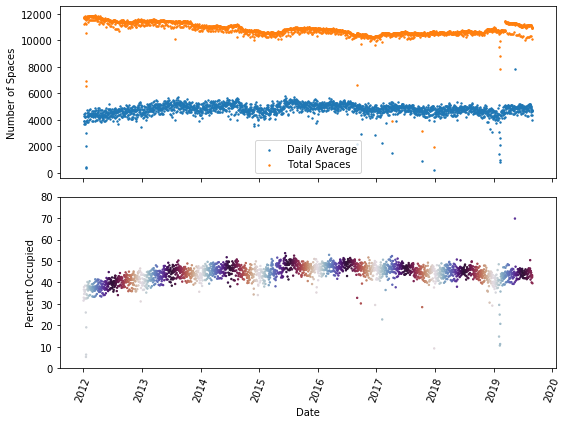

In [47]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8,6), sharex=True)

#plt.xticks(rotation=70)
#ax.set_title('blockface %d' % blockface_id)
ax1.scatter(all_blocks.index, all_blocks['PaidOccupancy'], label='Daily Average', s=2)
ax1.scatter(all_blocks.index, all_blocks['ParkingSpaceCount'], label='Total Spaces', s=2)
ax1.set_ylabel('Number of Spaces')
#ax1.xaxis.set_tick_params(rotation=70)
ax1.legend()

ax2.scatter(all_blocks.index, 
            100*all_blocks['PaidOccupancy']/all_blocks['ParkingSpaceCount'], 
            s=2, 
            c=all_blocks.index.dayofyear, 
            cmap='twilight')
ax2.xaxis.set_tick_params(rotation=70)
ax2.set_ylim(0,80)
ax2.set_ylabel('Percent Occupied')
ax2.set_xlabel('Date')


plt.tight_layout()
plt.savefig('../reports/figures/occupied_spaces_by_month.png')

There appears to be a few trends in the data.

1. The total number of parking spaces appears to have decreased in the first few years, but has since plateaued.
2. There is some seasonality to the data. The winter months appear to have fewer spots occupied.
3. The percent of spaces occupied around the city has hovered just under 50%.

## Some Outliers

There seems to be a number of days that fall outside of the normal range of available spaces as well as occupied spaces. Let's see if some of this may be due to weather.

In [48]:
strange_dates = all_blocks[all_blocks['ParkingSpaceCount'] < 9000.]
strange_dates

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,
2012-01-18,350.421917,6576.0
2012-01-19,443.254776,6899.0
2016-09-03,2172.688974,6614.0
2017-04-10,1534.551676,3938.0
2017-10-13,895.102298,3138.0
2017-12-27,184.399765,1982.0
2019-02-09,838.724327,7861.0
2019-02-11,1001.058861,8816.0


In [49]:
weather_data = pd.read_pickle('../data/processed/2010-2019_daily_weather.pkl')

In [50]:
weather_data.loc[strange_dates.index]

,PRCP,SNOW,TAVG,TMAX,TMIN
OccupancyDateTime,,,,,
2012-01-18,0.35,2.7,30.0,33.0,27.0
2012-01-19,0.50,2.2,28.0,29.0,27.0
2016-09-03,0.06,0.0,62.0,69.0,55.0
2017-04-10,0.32,0.0,48.5,54.0,43.0
2017-10-13,0.14,0.0,48.0,56.0,40.0
2017-12-27,0.00,0.0,37.0,40.0,34.0
2019-02-09,0.16,2.6,30.5,34.0,27.0
2019-02-11,0.74,1.9,32.5,36.0,29.0


In [51]:
import six

In [52]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [53]:
weather_data['Date'] = weather_data.index.date
weather_data = weather_data.reindex(sorted(weather_data.columns), axis=1)

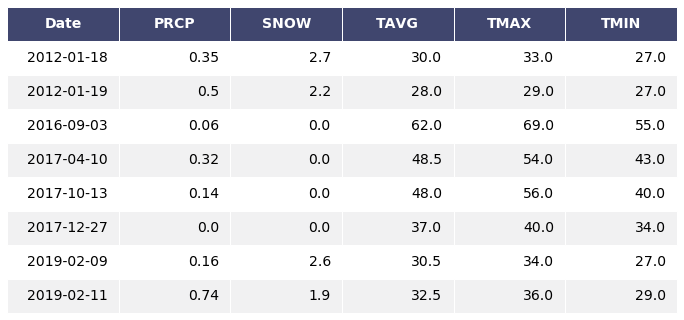

In [54]:

ax = render_mpl_table(weather_data.loc[strange_dates.index], header_columns=0, col_width=2.0)
ax.get_figure().savefig('../reports/figures/weird_dates_table.png')

A few of the dates above have actual snowfall (not so common for seattle, see below). Additionally, these days are towards the higher end of snowfall that is seen in seattle.

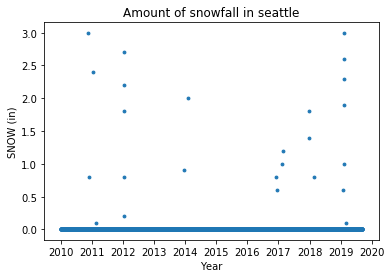

In [55]:
plt.figure(3)
plt.scatter(weather_data.index, weather_data.SNOW, s=8)
plt.xlabel('Year')
plt.ylabel('SNOW (in)')
plt.title('Amount of snowfall in seattle')
plt.savefig(figures_file_loc+'snowfall.png')

# Taking a closer look at the data

In the plot above showing parking occupancy for select blocks, it looks like there may be some missing data in years 2018-2019. Let's take a closer look at the data to see what is going on.

In [56]:
# Load in the Data
years = range(2018, 2020)

data_inspection = []

for year in years:
    year_data = pd.read_pickle('../data/interim/%d.pkl' % year)
    data_inspection.append(year_data.loc[blockface_ids])
data_inspection = pd.concat(data_inspection)

In [57]:
data_inspection.head()

PaidOccupancy  ParkingSpaceCount
SourceElementKey OccupancyDateTime                                    
1001             2018-01-02 09:00:00              0                5.0
                 2018-01-02 09:01:00              0                5.0
                 2018-01-02 09:02:00              0                5.0
                 2018-01-02 09:03:00              0                5.0
                 2018-01-02 09:04:00              0                5.0

### Scatter plot of parking spaces taken for representative blocks (2018-2019)

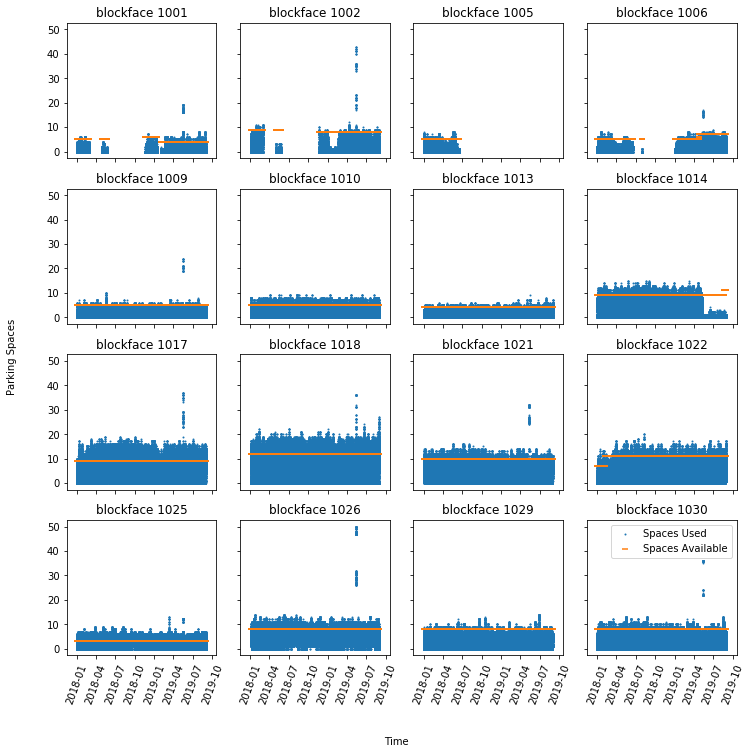

In [58]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    ax.set_title('blockface %d' % blockface_id)

    if blockface_id != 0:
        ax.scatter(data_inspection.loc[blockface_id].index, data_inspection.loc[blockface_id]['PaidOccupancy'], s=1, c='C0', label='Spaces Used')
        ax.scatter(data_inspection.loc[blockface_id].index, data_inspection.loc[blockface_id]['ParkingSpaceCount'], marker='_', c='C1', label='Spaces Available')
        #ax.legend()
        ax.xaxis.set_tick_params(rotation=70)
ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Spaces', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

In [59]:
blockface_id = 1001
first_date = '2018-01-01 00:00:00'
second_date = '2018-10-01 00:00:00'
data_inspection.loc[blockface_id][slice(first_date, second_date)].head()

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,
2018-01-02 09:00:00,0,5.0
2018-01-02 09:01:00,0,5.0
2018-01-02 09:02:00,0,5.0
2018-01-02 09:03:00,0,5.0
2018-01-02 09:04:00,0,5.0


In [60]:
blockface_id = 1001
first_date = '2018-07-01 00:00:00'
second_date = '2018-10-01 00:00:00'
data_inspection.loc[blockface_id][slice(first_date, second_date)].head()

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,


In [61]:
daily_data.loc[blockface_id][slice(first_date, second_date)]

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,


### Scatter Plot of Percent of spaces occupied for representative blocks (2018-2019)

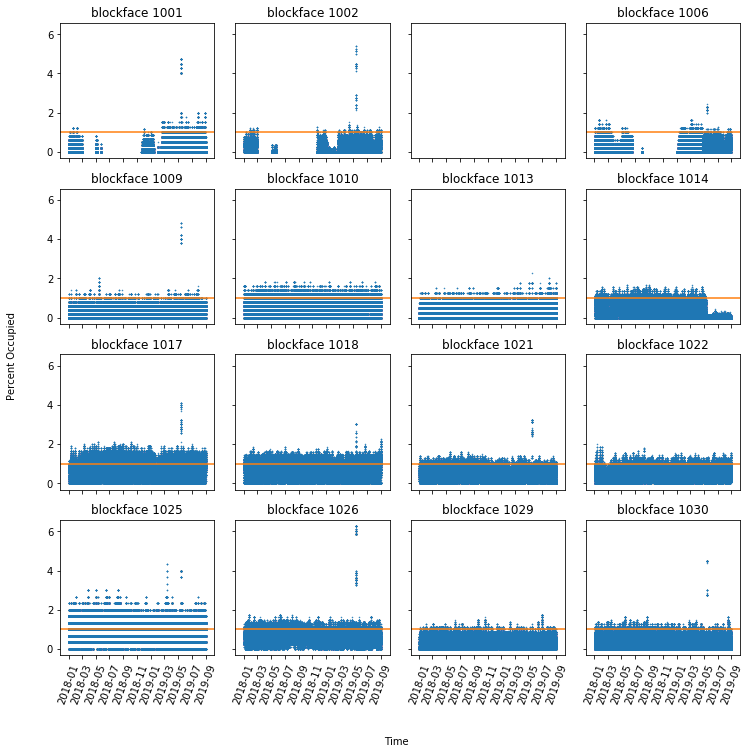

In [62]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    if blockface_id != 1005:
        subset = data_inspection.loc[blockface_id]
        ax.set_title('blockface %d' % blockface_id)
        ax.scatter(subset.index, subset['PaidOccupancy'] / subset['ParkingSpaceCount'], marker='.', s=1, c='C0')
        ax.axhline(1, c='C1')
        ax.xaxis.set_tick_params(rotation=70)
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Percent Occupied', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

### Week long sample of parking spaces occupied
Something seems weird about 15th of May 2019

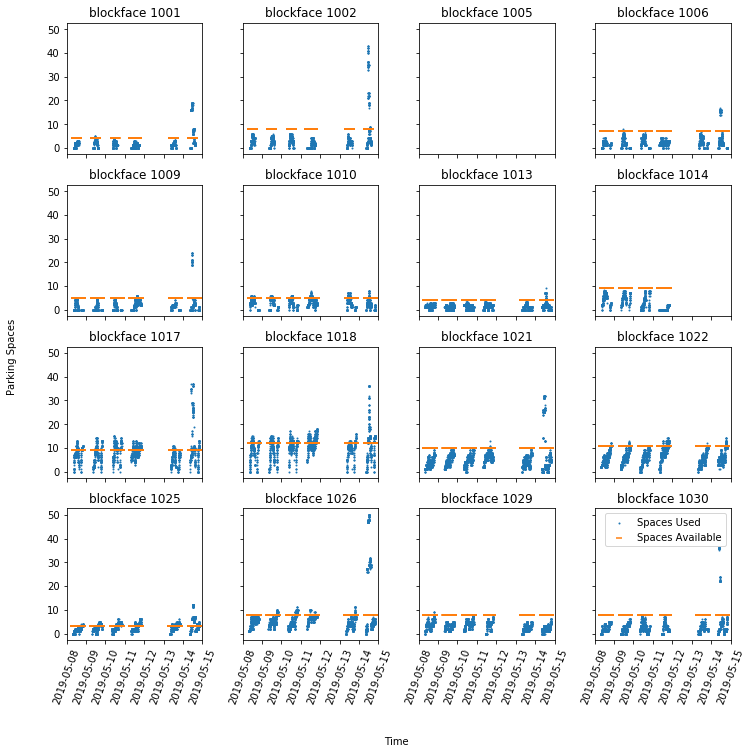

In [63]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

first_date = '2019-05-05 00:00:00'
second_date = '2019-05-15 00:00:00'

data_inspection.sort_index(level=['SourceElementKey','OccupancyDateTime'], inplace=True)
                            
#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    ax.set_title('blockface %d' % blockface_id)
    if blockface_id != 1005:
        subset = data_inspection.loc[(blockface_id,  slice(first_date, second_date)), :].loc[blockface_id]
        ax.scatter(subset.index, 
                   subset['PaidOccupancy'], 
                   s=1, c='C0', label='Spaces Used')
        ax.scatter(subset.index, 
                   subset['ParkingSpaceCount'], 
                   marker="_", c='C1', label='Spaces Available')
        ax.set_xlim([datetime.date(2019, 5, 8), datetime.date(2019, 5, 15)])
        ax.xaxis.set_tick_params(rotation=70)
ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Spaces', va='center', rotation='vertical')

plt.tight_layout()
plt.show()

## Errors in the data?

Looking at the data, some of the days show a larger number of spaces occupied than exist! How can this be possible? Let's take a more detailed look at blockface number 1018, the NE side of the street for 1st Ave between Stewart and Virginia.

In [64]:
blockface_detail.loc[1018]

Unnamed: 0                                                                  8
blockfacename                      1ST AVE BETWEEN STEWART ST AND VIRGINIA ST
location                    {'type': 'Point', 'coordinates': [-122.3418887...
paidparkingarea                                                      Belltown
paidparkingsubarea                                                      South
parkingcategory                                                  Paid Parking
parkingspacecount                                                          12
parkingtimelimitcategory                                                  120
sideofstreet                                                               NE
latitude                                                              47.6107
longitude                                                            -122.342
Name: 1018, dtype: object

In [65]:
data_inspection.loc[1018].tail()

,PaidOccupancy,ParkingSpaceCount
OccupancyDateTime,,
2019-08-31 19:55:00,16,12.0
2019-08-31 19:56:00,16,12.0
2019-08-31 19:57:00,16,12.0
2019-08-31 19:58:00,16,12.0
2019-08-31 19:59:00,16,12.0


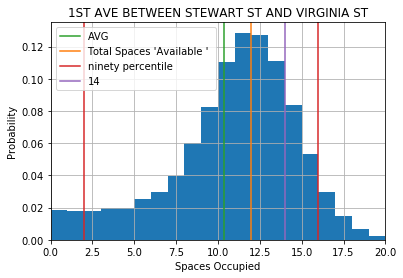

In [66]:
fifth, ninetyfifth = np.percentile(data_inspection.loc[1018].PaidOccupancy, (5, 95))

data_inspection.loc[1018].PaidOccupancy.hist(bins=np.arange(0,50,1), density=True)
avg = data_inspection.loc[1018].PaidOccupancy.mean()
plt.xlim(0, 20)
plt.title(blockface_detail.loc[1018].blockfacename)
plt.ylabel('Probability')
plt.xlabel('Spaces Occupied')
plt.axvline(avg, c='C2', label='AVG')
plt.axvline(12, c='C1', label='Total Spaces \'Available \' ')

plt.axvline(fifth, c='C3', label='ninety percentile')
plt.axvline(ninetyfifth, c='C3')
plt.axvline(14, c='C4', label='14')

plt.legend()
plt.savefig(figures_file_loc+'miscounted_spaces_available.png')

The data consistently shows 16 spaces bought and paid for, but the city only thinks 12 cars can fit. A quick look at google maps streetview shows about 270 ft worth of parking space. Getting 12 spaces gives around 22 ft per car. At an average car length of 15-16 ft, this leave around 6 ft between each car (a lot!). If we reduce this to 3 ft between each car, that gives us 14 parking spaces available. With people often leaving parking spaces without using the full time, getting to 16 spaces doesn't seem unreasonable

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [34]:
blockface_detail.loc[1009]

Unnamed: 0                                                                  3
blockfacename                        1ST AVE BETWEEN MADISON ST AND SPRING ST
location                    {'type': 'Point', 'coordinates': [-122.3366575...
paidparkingarea                                               Commercial Core
paidparkingsubarea                                                 Waterfront
parkingcategory                                                  Paid Parking
parkingspacecount                                                           5
parkingtimelimitcategory                                                   30
sideofstreet                                                               SW
latitude                                                               47.605
longitude                                                            -122.337
Name: 1009, dtype: object

This block has 110 ft of parking space, looks to be big enough for 6 parking spaces.

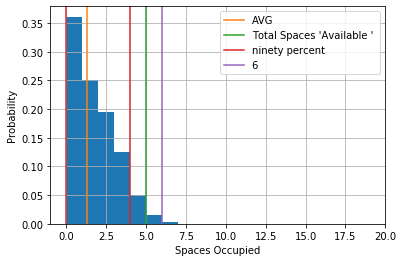

In [35]:
blk_idx = 1009
fifth, ninetyfifth = np.percentile(data_inspection.loc[blk_idx].PaidOccupancy, (5, 95))

data_inspection.loc[blk_idx].PaidOccupancy.hist(bins=np.arange(0,50,1), density=True)
avg = data_inspection.loc[blk_idx].PaidOccupancy.mean()
plt.xlim(-1, 20)
plt.ylabel('Probability')
plt.xlabel('Spaces Occupied')
plt.axvline(avg, c='C1', label='AVG')
plt.axvline(5, c='C2', label='Total Spaces \'Available \' ')

plt.axvline(fifth, c='C3', label='ninety percent')
plt.axvline(ninetyfifth, c='C3')
plt.axvline(6, c='C4', label='6')

plt.legend()
plt.show()

In [36]:
human_observed_data = pd.read_csv('1.collect_data/data_files/Annual_Parking_Study_Data.csv')


/Users/bethanys08/.pyenv/versions/anaconda3-2019.03/envs/myenv2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
human_observed_data[['Date Time']].head()

,Date Time
0,9-27-17 20:00:00
1,9-27-17 20:00:00
2,9-27-17 20:00:00
3,9-27-17 20:00:00
4,9-27-17 20:00:00


In [38]:
human_observed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145355 entries, 0 to 145354
Data columns (total 22 columns):
Elmntkey                  145277 non-null float64
Study_Area                145329 non-null object
Sub_Area                  132175 non-null object
Date Time                 145355 non-null object
Side                      145316 non-null object
Unitdesc                  145329 non-null object
Peak Hour_SDOT            15222 non-null object
Parking_Spaces            145057 non-null float64
Total_Vehicle_Count       144870 non-null float64
Dp_Count                  116353 non-null float64
Rpz_Count                 33500 non-null float64
TG_Car2Go                 34179 non-null float64
BMW_DN                    13139 non-null float64
Field Notes               15704 non-null object
Construction              145342 non-null object
Event Closure             145342 non-null object
Subarea Label             145355 non-null object
Study Year                145329 non-null float64
Peak

In [39]:

human_observed_data = human_observed_data[~human_observed_data['Elmntkey'].isna()].astype({'Elmntkey': 'int32'})


In [40]:
human_observed_data['Date Time'] = pd.to_datetime(human_observed_data['Date Time'], format='%m-%d-%y %H:%M:%S')


In [41]:
human_observed_data = human_observed_data.set_index(['Elmntkey', 'Date Time'])

In [42]:
human_observed_data.sort_index(inplace=True)

In [43]:
human_observed_data.head()

Study_Area Sub_Area Side  \
Elmntkey Date Time                                                     
1001     2014-04-22 08:00:00  Pioneer Square - Weekday     Core   SW   
         2014-04-22 09:00:00  Pioneer Square - Weekday     Core   SW   
         2014-04-22 10:00:00  Pioneer Square - Weekday     Core   SW   
         2014-04-22 11:00:00  Pioneer Square - Weekday     Core   SW   
         2014-04-22 12:00:00  Pioneer Square - Weekday     Core   SW   

                                                               Unitdesc  \
Elmntkey Date Time                                                        
1001     2014-04-22 08:00:00  1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST   
         2014-04-22 09:00:00  1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST   
         2014-04-22 10:00:00  1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST   
         2014-04-22 11:00:00  1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST   
         2014-04-22 12:00:00  1ST AVE BETWEEN CHERRY ST AND COLUMBIA ST   

                             Peak Hour_SDOT  Parking_Spaces  \
Elmntkey Date Time                                            
1001     2014-04-22 08:00:00    6-9AM 3-6PM             0.0   
         2014-04-22 09:00:00    6-9AM 3-6PM             5.0   
         2014-04-22 10:00:00    6-9AM 3-6PM             5.0   
         2014-04-22 11:00:00    6-9AM 3-6PM             5.0   
         2014-04-22 12:00:00    6-9AM 3-6PM             5.0   

                              Total_Vehicle_Count  Dp_Count  Rpz_Count  \
Elmntkey Date Time                                                       
1001     2014-04-22 08:00:00                  0.0       0.0        NaN   
         2014-04-22 09:00:00                  1.0       1.0        NaN   
         2014-04-22 10:00:00                  2.0       0.0        NaN   
         2014-04-22 11:00:00                  2.0       0.0        NaN   
         2014-04-22 12:00:00                  6.0       1.0        NaN   

                              TG_Car2Go  BMW_DN     Field Notes Construction  \
Elmntkey Date Time                                                             
1001     2014-04-22 08:00:00        NaN     NaN  no stops 6-9am           No   
         2014-04-22 09:00:00        NaN     NaN             NaN           No   
         2014-04-22 10:00:00        NaN     NaN             NaN           No   
         2014-04-22 11:00:00        NaN     NaN       XMT in pd           No   
         2014-04-22 12:00:00        NaN     NaN             NaN           No   

                             Event Closure  \
Elmntkey Date Time                           
1001     2014-04-22 08:00:00            No   
         2014-04-22 09:00:00            No   
         2014-04-22 10:00:00            No   
         2014-04-22 11:00:00            No   
         2014-04-22 12:00:00            No   

                                                        Subarea Label  \
Elmntkey Date Time                                                      
1001     2014-04-22 08:00:00  Pioneer Square - Weekday (Core Subarea)   
         2014-04-22 09:00:00  Pioneer Square - Weekday (Core Subarea)   
         2014-04-22 10:00:00  Pioneer Square - Weekday (Core Subarea)   
         2014-04-22 11:00:00  Pioneer Square - Weekday (Core Subarea)   
         2014-04-22 12:00:00  Pioneer Square - Weekday (Core Subarea)   

                              Study Year Peak Hour? (Yes or No)  RPZ Blocks  \
Elmntkey Date Time                                                            
1001     2014-04-22 08:00:00      2014.0                    Yes         NaN   
         2014-04-22 09:00:00      2014.0                     No         NaN   
         2014-04-22 10:00:00      2014.0                     No         NaN   
         2014-04-22 11:00:00      2014.0                     No         NaN   
         2014-04-22 12:00:00      2014.0                     No         NaN   

                              CSM Time Stamp  
Elmntkey Date Time                            
1001    

In [44]:
human_observed_data['date'] = human_observed_data.index.get_level_values(1).date

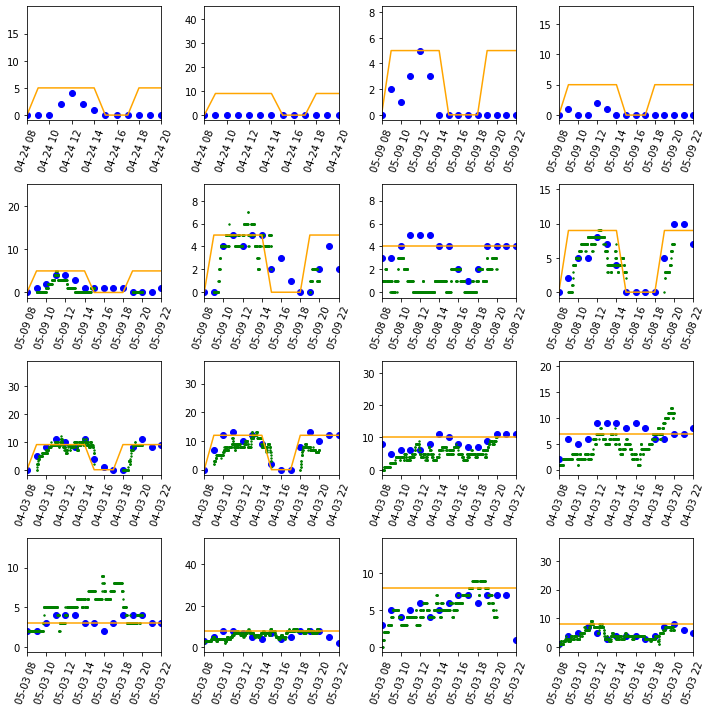

In [45]:
fig, axs = plt.subplots(4,4, figsize=(10,10))

for ax, block_ind in zip(axs.ravel(), blockface_ids):
    date = human_observed_data.loc[block_ind].date.unique()[-1]
    subset = human_observed_data.loc[block_ind][human_observed_data.loc[block_ind].date == date]
    ax.scatter(subset.index, subset.Total_Vehicle_Count, c='b', label='Actual')
    ax.plot(subset.index, subset.Parking_Spaces, c='orange', label='Max')
    
    machine_data = data_inspection.loc[block_ind]
    ax.scatter(machine_data.index, machine_data.PaidOccupancy, c='g', s=2, label='Machine Actual')
    ax.set_xlim([subset.index[0], subset.index[-1]])
    
    ax.xaxis.set_tick_params(rotation=70)
plt.tight_layout()
plt.show()

## Autocorrelation

In [50]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]

In [51]:
def percent_diff(x):
    return x[1:] - x[:-1]

In [52]:
quarter_hour_data = pd.read_pickle('1.collect_data/data_files/15min_impute_by_hour.pkl').dropna()

In [53]:
first_date = '2018-01-01 00:00:00'
second_date = '2020-01-01 00:00:00'

quarter_hour_data.sort_index(level=['SourceElementKey','OccupancyDateTime'], inplace=True, kind='mergesort')


In [65]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

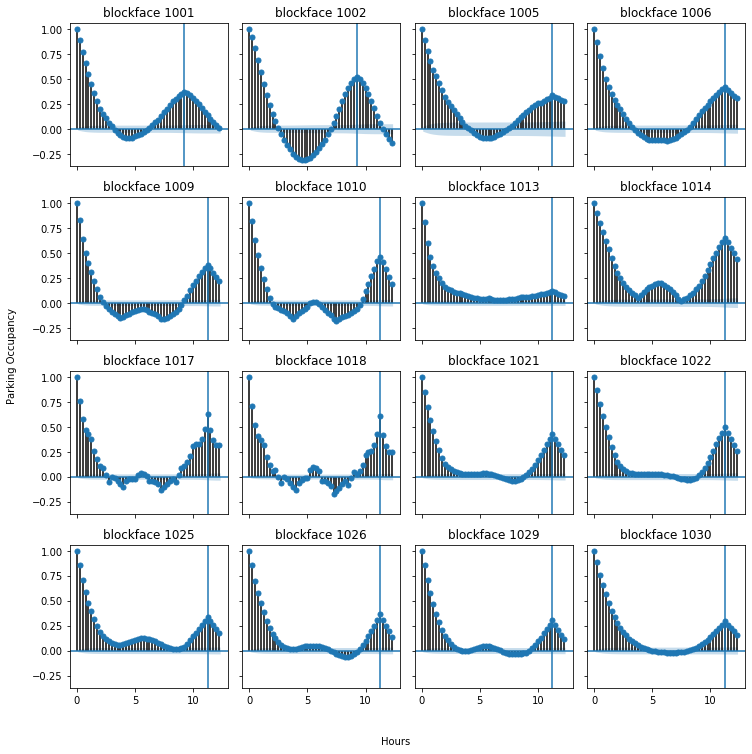

In [55]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    curr_data = quarter_hour_data.loc[(blockface_id, slice(first_date, second_date)), :]['PercentOccupied'].values
    plot_acf(curr_data, ax=ax, lags=np.arange(50))
    intervals = 1+4*(quarter_hour_data.loc[blockface_id].index.hour.max() - quarter_hour_data.loc[blockface_id].index.hour.min())
        
    ax.set_title('blockface %d' % (blockface_id))
    ax.set_xticks([0, 20, 40])
    ax.set_xticklabels([0, 5, 10])
    ax.axvline(intervals)

#ax.legend()
fig.text(0.5, -0.04, 'Hours', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Auto_correlation.png')

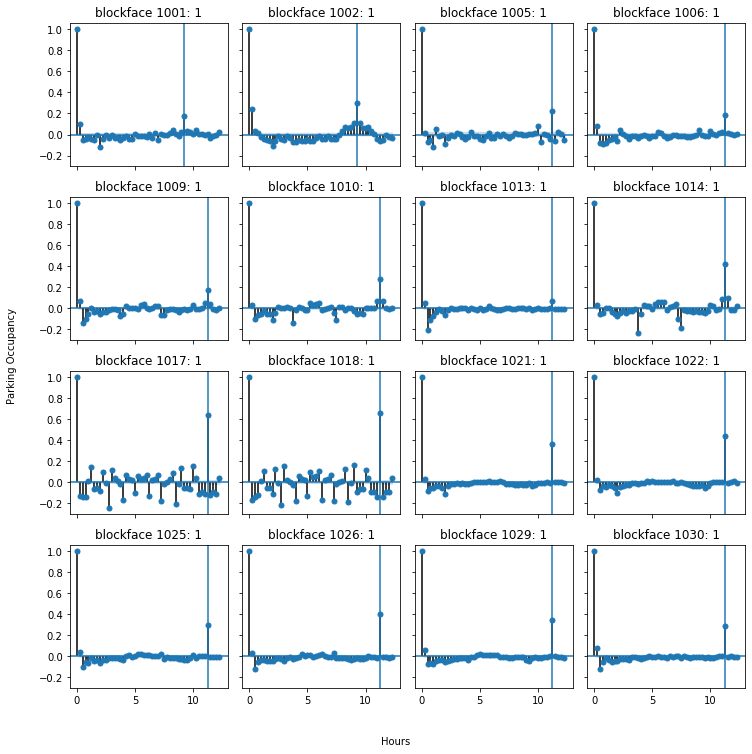

In [61]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    curr_data = quarter_hour_data.loc[(blockface_id, slice(first_date, second_date)), :]['PercentOccupied'].values
    
    curr_data = np.diff(curr_data)
    
    plot_acf(curr_data, ax=ax, lags=np.arange(50), zero=False)
    intervals = 1+4*(quarter_hour_data.loc[blockface_id].index.hour.max() - quarter_hour_data.loc[blockface_id].index.hour.min())
        
    ax.set_title('blockface %d: %d' % (blockface_id, d))
    ax.set_xticks([0, 20, 40])
    ax.set_xticklabels([0, 5, 10])
    ax.axvline(intervals)

#ax.legend()
fig.text(0.5, -0.04, 'Hours', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Auto_correlation_with_diffs.png')

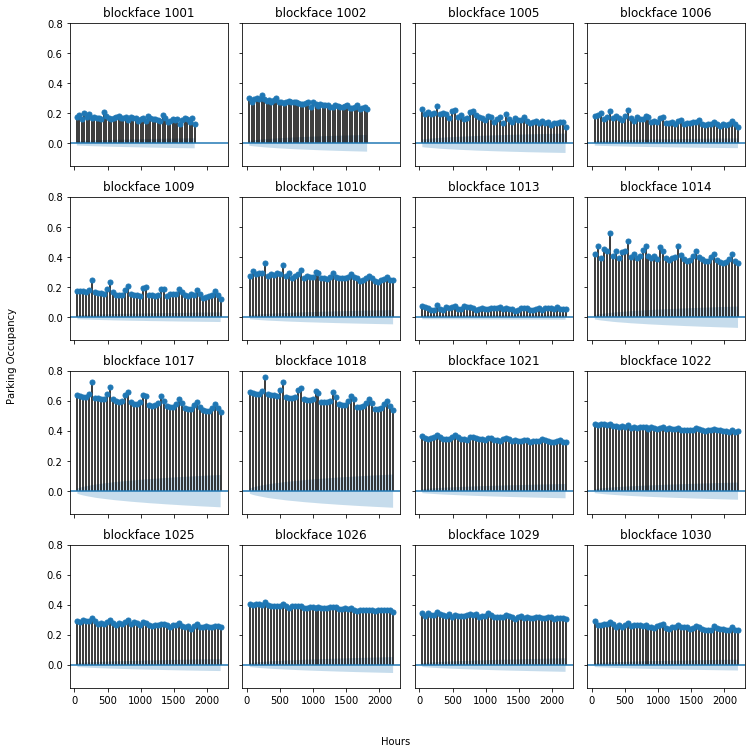

In [63]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    curr_data = quarter_hour_data.loc[(blockface_id, slice(first_date, second_date)), :]['PercentOccupied'].values

    intervals = 1+4*(quarter_hour_data.loc[blockface_id].index.hour.max() - quarter_hour_data.loc[blockface_id].index.hour.min())
    lags = np.arange(intervals, intervals*50, intervals)
    curr_data = np.diff(curr_data)
    
    plot_acf(curr_data, ax=ax, lags=lags, zero=False)
        
    ax.set_title('blockface %d' % (blockface_id))
    #ax.set_xticks([0, 20, 40])
    #ax.set_xticklabels([0, 5, 10])
    #ax.axvline(intervals)

#ax.legend()
fig.text(0.5, -0.04, 'Hours', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Auto_correlation_with_diffs_and_seasonality.png')

/Users/bethanys08/.pyenv/versions/anaconda3-2019.03/envs/myenv2/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


KeyboardInterrupt: 

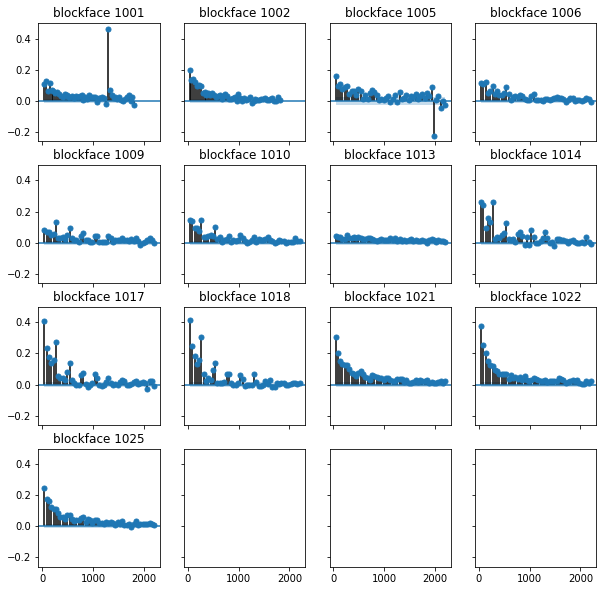

In [66]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    curr_data = quarter_hour_data.loc[(blockface_id, slice(first_date, second_date)), :]['PercentOccupied'].values

    intervals = 1+4*(quarter_hour_data.loc[blockface_id].index.hour.max() - quarter_hour_data.loc[blockface_id].index.hour.min())
    lags = np.arange(intervals, intervals*50, intervals)
    curr_data = np.diff(curr_data)
    
    plot_pacf(curr_data, ax=ax, lags=lags, zero=False)
        
    ax.set_title('blockface %d' % (blockface_id))
    #ax.set_xticks([0, 20, 40])
    #ax.set_xticklabels([0, 5, 10])
    #ax.axvline(intervals)

#ax.legend()
fig.text(0.5, -0.04, 'Hours', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Partial_auto_correlation_with_diffs_and_seasonality.png')

In [ ]:
quarter_hour_data.loc[(blockface_id, slice(first_date, second_date)), :]['PercentOccupied'].values

## Time of Day

In [ ]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    current_block = quarter_hour_data.loc[blockface_id]
    current_block['hour'] = current_block.index.hour
    mean_std = current_block[['PercentOccupied', 'hour']].groupby('hour').agg(['mean', 'std'])  
    mean_std.columns = mean_std.columns.get_level_values(1)

    ax.set_title('blockface %d' % blockface_id)
    
    ax.plot(mean_std[ 'mean'], lw=2, marker='o',color='blue')
    ax.fill_between(mean_std.index,
                    mean_std[ 'mean'].values+mean_std[ 'std'].values, 
                    mean_std[ 'mean'].values-mean_std[ 'std'].values, 
                    facecolor='blue', alpha=0.5)
    #ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
    
    
    #ax.legend()
    #ax.xaxis.set_tick_params(rotation=70)
#ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Average_Occupancy_By_Time_Of_Day.png')

## Day of Week

In [ ]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    current_block = quarter_hour_data.loc[blockface_id]
    current_block['dayofweek'] = current_block.index.dayofweek
    mean_std = current_block[['PercentOccupied', 'dayofweek']].groupby('dayofweek').agg(['mean', 'std'])  
    mean_std.columns = mean_std.columns.get_level_values(1)

    ax.set_title('blockface %d' % blockface_id)
    
    ax.plot(mean_std[ 'mean'], lw=2, marker='o',color='blue')
    ax.fill_between(mean_std.index,
                    mean_std[ 'mean'].values+mean_std[ 'std'].values, 
                    mean_std[ 'mean'].values-mean_std[ 'std'].values, 
                    facecolor='blue', alpha=0.5)
    #ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
    
    
    #ax.legend()
    #ax.xaxis.set_tick_params(rotation=70)
#ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Average_Occupancy_By_Day_Of_Month.png')

Some of the areas seems to have a different trend for weekends (day=5,6)

## Day of Month

In [ ]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    current_block = quarter_hour_data.loc[blockface_id]
    current_block['day'] = current_block.index.day
    mean_std = current_block[['PercentOccupied', 'day']].groupby('day').agg(['mean', 'std'])  
    mean_std.columns = mean_std.columns.get_level_values(1)

    ax.set_title('blockface %d' % blockface_id)
    
    ax.plot(mean_std[ 'mean'], lw=2, marker='o',color='blue')
    ax.fill_between(mean_std.index,
                    mean_std[ 'mean'].values+mean_std[ 'std'].values, 
                    mean_std[ 'mean'].values-mean_std[ 'std'].values, 
                    facecolor='blue', alpha=0.5)
    #ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
    
    
    #ax.legend()
    #ax.xaxis.set_tick_params(rotation=70)
#ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Average_Occupancy_By_Day_Of_Month.png')

## Month

In [ ]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    current_block = quarter_hour_data.loc[blockface_id]
    current_block['month'] = current_block.index.month
    mean_std = current_block[['PercentOccupied', 'month']].groupby('month').agg(['mean', 'std'])  
    mean_std.columns = mean_std.columns.get_level_values(1)

    ax.set_title('blockface %d' % blockface_id)
    
    ax.plot(mean_std[ 'mean'], lw=2, marker='o',color='blue')
    ax.fill_between(mean_std.index,
                    mean_std[ 'mean'].values+mean_std[ 'std'].values, 
                    mean_std[ 'mean'].values-mean_std[ 'std'].values, 
                    facecolor='blue', alpha=0.5)
    #ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
    
    
    #ax.legend()
    #ax.xaxis.set_tick_params(rotation=70)
#ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Average_Occupancy_By_Month_Of_Year.png')

In [ ]:
fig, axs = plt.subplots(4,4, sharex=True, sharey=True, figsize=(10,10))

#plt.xticks(rotation=70)
for blockface_id, ax in zip(blockface_ids, axs.flat):
    current_block = quarter_hour_data.loc[blockface_id]
    current_block['weekofyear'] = current_block.index.weekofyear
    mean_std = current_block[['PercentOccupied', 'weekofyear']].groupby('weekofyear').agg(['mean', 'std'])  
    mean_std.columns = mean_std.columns.get_level_values(1)

    ax.set_title('blockface %d' % blockface_id)
    
    ax.plot(mean_std[ 'mean'], lw=2, marker='o',color='blue')
    ax.fill_between(mean_std.index,
                    mean_std[ 'mean'].values+mean_std[ 'std'].values, 
                    mean_std[ 'mean'].values-mean_std[ 'std'].values, 
                    facecolor='blue', alpha=0.5)
    #ax.fill_between(t, mu2+sigma2, mu2-sigma2, facecolor='yellow', alpha=0.5)
    
    
    #ax.legend()
    #ax.xaxis.set_tick_params(rotation=70)
#ax.legend()
fig.text(0.5, -0.04, 'Time', ha='center')
fig.text(-0.04, 0.5, 'Parking Occupancy', va='center', rotation='vertical')

plt.tight_layout()
plt.savefig('images/Average_Occupancy_By_Week_Of_Year.png')

# Make gif of average daily parking occupation

In [ ]:
#change index name so that it can be joined
blockface_detail.index.name = 'SourceElementKey'
# join and reset index (will be grouped soon)
grouped_df = quarter_hour_data.join(blockface_detail[['latitude', 'longitude']], how='inner').reset_index()
# drop unnecesary columns
grouped_df = grouped_df.drop(labels = ['PaidOccupancy', 'ParkingSpaceCount'], axis=1)
# add time
grouped_df['time'] = grouped_df.OccupancyDateTime.dt.time
# group by time, blockID and take mean
grouped_df = grouped_df.groupby(['time', 'SourceElementKey']).mean()
grouped_df.head(10)

In [ ]:
# read in map of seattle
img = matplotlib.image.imread('1.collect_data/seattle_map.png')

# loop over times (1st index in multiindex)
for i, time in enumerate(grouped_df.index.get_level_values(0).unique()):

    # select block means with same time
    time_df = grouped_df.loc[time]
    
    dpi=80

    height, width, nbands = img.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(i, figsize=figsize)

    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    ax.imshow(img,extent=[-122.41, -122.28,47.55, 47.7])
    ax.text(-122.41, 47.55, time.strftime('%H-%M'), fontsize=20)
    

    scat = ax.scatter(time_df.longitude,time_df.latitude,c=time_df.PercentOccupied, cmap='autumn_r', s=3, vmin=0, vmax=1)
    cbaxes = fig.add_axes([0.1, 0.1, 0.8, 0.03]) 
    cb = plt.colorbar(scat, cax = cbaxes, orientation="horizontal")
    cb.set_label('Parking Occupancy', fontsize=20)
    #ax.text()
    #plt.colorbar(scat, ax=ax, location='bottom', fraction=.07)

    plt.savefig('images/daily_gif/%s.png' % (time.strftime('%H-%M')), dpi=dpi)
    plt.close(i)

In [ ]:
!convert -delay 20 -loop 0 images/daily_gif/*.png images/daily_gif/mygif.gif

![SegmentLocal](images/daily_gif/mygif.gif "segment")

In [ ]:
current_block = quarter_hour_data.loc[1009]
current_block
t = np.arange(len(current_block))
plt.figure()
sp = np.fft.fft(current_block.PercentOccupied.values)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, label='real')
#plt.plot(freq, sp.imag, label='imag')
plt.legend()
plt.show()